## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
 
# Combine the data into a single dataset
raw_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
raw_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(len(raw_data_df["Mouse ID"].value_counts()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = raw_data_df.loc[raw_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df = raw_data_df[raw_data_df['Mouse ID'].isin(duplicate_mice)==False]

In [5]:
# Checking the number of mice in the clean DataFrame.
print(len(data_df["Mouse ID"].value_counts()))

248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_rg = data_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]  
med_rg = data_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var_rg = data_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"] 
std_rg = data_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_rg = data_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean": mean_rg, "Median":med_rg, 
                           "Variance":var_rg, "Standard Deviation": std_rg, "SEM": sem_rg})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Total Number Of Measurements ')

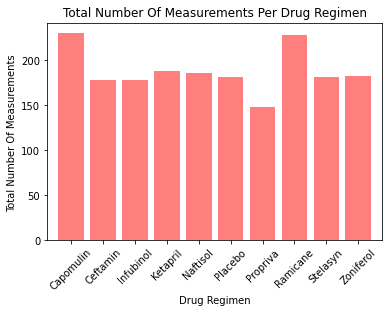

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


total_ms = data_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"] 
#print(total_ms) 

x_axis = np.arange(len(total_ms))
plt.bar(x_axis, total_ms, color='r', alpha=0.5, align='center')

ticks = [value for value in x_axis]

plt.xticks(ticks, ['Capomulin', 'Ceftamin', 'Infubinol', 
                   'Ketapril', 'Naftisol', 'Placebo', 
                   'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Total Number Of Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number Of Measurements ")


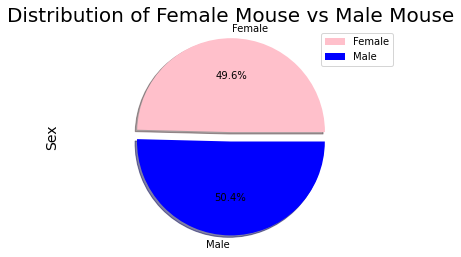

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = data_df.groupby(['Mouse ID','Sex']) 
gender_df = pd.DataFrame(gender_group.size())

# Create the dataframe with total count of Female and Male mice
total = pd.DataFrame(gender_df.groupby(['Sex']).count())
total.columns = ['Total'] 
total

labels = ['Female', 'Male']
colors = ['pink', 'blue']
explode = (0.1, 0)
 
plot = total.plot.pie(y='Total', colors = colors, explode = explode, shadow = True, autopct="%1.1f%%", labels=labels)

plt.title('Distribution of Female Mouse vs Male Mouse', fontsize = 20)
plt.ylabel('Sex',fontsize = 14) 

plt.axis("equal") 
plt.show()



## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

med1_df = data_df.loc[data_df['Drug Regimen'] == "Capomulin",:]
med2_df = data_df.loc[data_df['Drug Regimen'] == "Ramicane", :]
med3_df = data_df.loc[data_df['Drug Regimen'] == "Infubinol", :]
med4_df = data_df.loc[data_df['Drug Regimen'] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [11]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
